<a href="https://colab.research.google.com/github/CalHdzg/Reto-Analisis-de-Trafico-en-Aeropuertos/blob/main/DS_C2_SC2_CarlosAlejandroHernandezGomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload() #para importar el archivo de mi computadora

Saving country_vaccinations.csv to country_vaccinations.csv


a. Extraer la información del archivo.

In [ ]:
import pandas as pd

df = pd.read_csv('country_vaccinations.csv')
df #Corro al dataframe para ver que se haya extraido correctamente

country    iso_code     date     total_vaccinations  \
0      Afghanistan    AFG    2021-02-22             0.0       
1      Afghanistan    AFG    2021-02-23             NaN       
2      Afghanistan    AFG    2021-02-24             NaN       
3      Afghanistan    AFG    2021-02-25             NaN       
4      Afghanistan    AFG    2021-02-26             NaN       
...            ...      ...         ...                 ...   
86507     Zimbabwe    ZWE    2022-03-25       8691642.0       
86508     Zimbabwe    ZWE    2022-03-26       8791728.0       
86509     Zimbabwe    ZWE    2022-03-27       8845039.0       
86510     Zimbabwe    ZWE    2022-03-28       8934360.0       
86511     Zimbabwe    ZWE    2022-03-29       9039729.0       

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                0.0                   NaN                     NaN          
1                NaN                   NaN                     NaN          
2                NaN                   NaN                     NaN          
3                NaN                   NaN                     NaN          
4                NaN                   NaN                     NaN          
...                  ...                      ...                     ...   
86507      4814582.0             3473523.0                139213.0          
86508      4886242.0             3487962.0                100086.0          
86509      4918147.0             3493763.0                 53311.0          
86510      4975433.0             3501493.0                 89321.0          
86511      5053114.0             3510256.0                105369.0          

       daily_vaccinations  total_vaccinations_per_hundred  \
0                NaN                     0.00               
1             1367.0                      NaN               
2             1367.0                      NaN               
3             1367.0                      NaN               
4             1367.0                      NaN               
...                   ...                             ...   
86507        69579.0                    57.59               
86508        83429.0                    58.25               
86509        90629.0                    58.61               
86510       100614.0                    59.20               
86511       103751.0                    59.90               

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                   0.00                               NaN                  
1                    NaN                               NaN                  
2                    NaN                               NaN                  
3                    NaN                               NaN                  
4                    NaN                               NaN                  
...                              ...                                  ...   
86507              31.90                             23.02                  
86508              32.38                             23.11                  
86509              32.59                             23.15                  
86510              32.97                             23.20                  
86511              33.48                             23.26                  

       daily_vaccinations_per_million  \
0                     NaN               
1                    34.0               
2                    34.0               
3                    34.0               
4                    34.0               
...                               ...   
86507              4610.0               
86508              5528.0               
86509              6005.0               
86510              6667.0               
86511              6874.0               

                                      vaccines                                  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing   
1      John

b. Mostrar la estructura y tipos de datos de cada columna para identificar qué operaciones puedes realizar con cada una de ellas, asegurándote que las columnas con fechas sean del tipo datetime64.

In [ ]:
#df.info() #Para saber el tipo de datos que tenemos por columna (lo dejo comentado ahora para que no se imprima doble)

#La única fecha está en la columna 'date' pero, a priori, el tipo de dato es 'object', por lo que es necesario especificarlo.

df['date'] = pd.to_datetime(df['date']) #Cambia la columna a formato de fechas

df.info() #Ahora sí, 'date' está en formato 'datetime64[ns]' como se quería

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

c. Determinar la cantidad de vacunas aplicadas de cada compañía (con base en cómo lo reporta cada país en la columna vaccines, en otras palabras, agrupe por vaccines y realice la sumatoria).

In [ ]:
df[['vaccines', 'total_vaccinations']].groupby('vaccines').sum() #Realicé la suma sólo sobre la columna 'total_vaccinations', pues buscamos el total de vacunas aplicadas por cada compañía.

total_vaccinations
vaccines                                                              
Abdala, Johnson&Johnson, Oxford/AstraZeneca, Pf...        1.784348e+08
Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bio...        1.791450e+10
Abdala, Sinopharm/Beijing, Sinovac, Soberana02,...        4.228568e+08
Abdala, Soberana Plus, Soberana02                         6.405166e+09
COVIran Barekat, Covaxin, FAKHRAVAC, Oxford/Ast...        1.069480e+10
...                                                                ...
Pfizer/BioNTech, Sinovac, Turkovac                        3.392310e+10
Pfizer/BioNTech, Sputnik V                                3.863380e+06
QazVac, Sinopharm/Beijing, Sputnik V                      3.585429e+09
Sinopharm/Beijing                                         3.080671e+07
Sinopharm/Beijing, Sputnik V                              6.451243e+08

[84 rows x 1 columns]

d. Obtener la cantidad de vacunas aplicadas en todo el mundo.

In [ ]:
print ('El total de vacunas aplicadas en todo el mundo es de', df['total_vaccinations'].sum(), 'vacunas.') #Simplemente es la suma de todas las 'vacunas totales'.

El total de vacunas aplicadas en todo el mundo es de 2002854013761.0 vacunas.


e. Calcular el promedio de vacunas aplicadas por país.

In [ ]:
dfsuma = df[['country', 'total_vaccinations']].groupby('country').sum() #Primero obtengo al total (la suma) de vacunas aplicadas por país
print('El promedio de vacunas por país es de', dfsuma['total_vaccinations'].mean(), 'vacunas.') #Y luego obtengo el promedio de esos totales de vacunas por país

El promedio de vacunas por país es de 8981408133.4574 vacunas.


f. Determinar la cantidad de vacunas aplicadas el día 29/01/21 en todo el mundo.

In [ ]:
dffecha = df[df['date']=='2021-01-29'] #Primero obtengo a los datos con la fecha especificada
print('La cantidad de vacunas aplicadas el día 29/01/21 en todo el mundo es de', dffecha['total_vaccinations'].sum(), 'vacunas.') #Luego sumo a todas las vacunas totales del dataframe ya filtrado

La cantidad de vacunas aplicadas el día 29/01/21 en todo el mundo es de 82952931.0 vacunas.


g. Crear un dataframe nuevo denominado conDiferencias que contenga los datos originales y una columna derivada (diferencias) con las diferencias de aplicación entre las columnas daily_vaccinations y daily_vaccinations_raw.  

In [ ]:
conDiferencias = df.copy() #Primero hago una copia del dataframe original para no alterarlo
conDiferencias['diferencias'] = conDiferencias['daily_vaccinations']-conDiferencias['daily_vaccinations_raw'].where(conDiferencias['daily_vaccinations_raw'].notna(), 0)
#En vez de sólo poner la resta, utilicé 'where' para cambiar los datos vacíos por ceros (pues entiendo que cuando no ponemos dato, siginifica que es cero), para que la columna nueva salga bien.
conDiferencias

country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                 0.0                0.0   
1      Afghanistan      AFG 2021-02-23                 NaN                NaN   
2      Afghanistan      AFG 2021-02-24                 NaN                NaN   
3      Afghanistan      AFG 2021-02-25                 NaN                NaN   
4      Afghanistan      AFG 2021-02-26                 NaN                NaN   
...            ...      ...        ...                 ...                ...   
86507     Zimbabwe      ZWE 2022-03-25           8691642.0          4814582.0   
86508     Zimbabwe      ZWE 2022-03-26           8791728.0          4886242.0   
86509     Zimbabwe      ZWE 2022-03-27           8845039.0          4918147.0   
86510     Zimbabwe      ZWE 2022-03-28           8934360.0          4975433.0   
86511     Zimbabwe      ZWE 2022-03-29           9039729.0          5053114.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                          NaN                     NaN                 NaN   
1                          NaN                     NaN              1367.0   
2                          NaN                     NaN              1367.0   
3                          NaN                     NaN              1367.0   
4                          NaN                     NaN              1367.0   
...                        ...                     ...                 ...   
86507                3473523.0                139213.0             69579.0   
86508                3487962.0                100086.0             83429.0   
86509                3493763.0                 53311.0             90629.0   
86510                3501493.0                 89321.0            100614.0   
86511                3510256.0                105369.0            103751.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
86507                           57.59                          31.90   
86508                           58.25                          32.38   
86509                           58.61                          32.59   
86510                           59.20                          32.97   
86511                           59.90                          33.48   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                      NaN                             NaN   
1                                      NaN                            34.0   
2                                      NaN                            34.0   
3                                      NaN                            34.0   
4                                      NaN                            34.0   
...                                    ...                             ...   
86507                                23.02                          4610.0   
86508                                23.11                          5528.0   
86509                                23.15                          6005.0   
86510                                23.20                          6667.0   
86511                                23.26                          6874.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

h. Obtener el periodo de tiempo entre el registro con fecha más reciente y el registro con fecha más antigua.

In [ ]:
#Ojo, es importante correr la parte de la pregunta b. (con la parte 'df['date'] = pd.to_datetime(df['date']) ) en caso de no haberlo hecho prar que ésta línea corra bien.

df['date'].max() - df['date'].min() #Simplemente es la diferencia de la fecha 'max' y la 'min'

Timedelta('482 days 00:00:00')

i. Crear un dataframe nuevo denominado conCantidad que contenga los datos originales y una columna derivada (canVac) con la cantidad de marcas vacunas utilizadas cada día (usar la columna vaccines y separar por el caracter ',' ).

In [ ]:
conCantidad = df.copy() #Creo una copia para no afectar al original
conCantidad['canVac'] = conCantidad['vaccines'].str.split(',').str.len() #'split' para separar por comas y luego 'len' para contar la cantidad
conCantidad

country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                 0.0                0.0   
1      Afghanistan      AFG 2021-02-23                 NaN                NaN   
2      Afghanistan      AFG 2021-02-24                 NaN                NaN   
3      Afghanistan      AFG 2021-02-25                 NaN                NaN   
4      Afghanistan      AFG 2021-02-26                 NaN                NaN   
...            ...      ...        ...                 ...                ...   
86507     Zimbabwe      ZWE 2022-03-25           8691642.0          4814582.0   
86508     Zimbabwe      ZWE 2022-03-26           8791728.0          4886242.0   
86509     Zimbabwe      ZWE 2022-03-27           8845039.0          4918147.0   
86510     Zimbabwe      ZWE 2022-03-28           8934360.0          4975433.0   
86511     Zimbabwe      ZWE 2022-03-29           9039729.0          5053114.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                          NaN                     NaN                 NaN   
1                          NaN                     NaN              1367.0   
2                          NaN                     NaN              1367.0   
3                          NaN                     NaN              1367.0   
4                          NaN                     NaN              1367.0   
...                        ...                     ...                 ...   
86507                3473523.0                139213.0             69579.0   
86508                3487962.0                100086.0             83429.0   
86509                3493763.0                 53311.0             90629.0   
86510                3501493.0                 89321.0            100614.0   
86511                3510256.0                105369.0            103751.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
86507                           57.59                          31.90   
86508                           58.25                          32.38   
86509                           58.61                          32.59   
86510                           59.20                          32.97   
86511                           59.90                          33.48   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                      NaN                             NaN   
1                                      NaN                            34.0   
2                                      NaN                            34.0   
3                                      NaN                            34.0   
4                                      NaN                            34.0   
...                                    ...                             ...   
86507                                23.02                          4610.0   
86508                                23.11                          5528.0   
86509                                23.15                          6005.0   
86510                                23.20                          6667.0   
86511                                23.26                          6874.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

j. Generar un dataframe denominado antes20 con todos los registros que se hayan realizado antes del 20 de diciembre de 2020.

In [ ]:
#En este caso no es necesario hacer una copia antes pues no estamos modificando al dataframe usado para obtener los datos
antes20 = df[df['date'] < '2020-12-20'] #Pido que la fecha sea 'menor' (o sea, de antes) que la fecha solicitada
antes20

country iso_code       date  total_vaccinations  \
13403         Canada      CAN 2020-12-14                 5.0   
13404         Canada      CAN 2020-12-15               727.0   
13405         Canada      CAN 2020-12-16              3025.0   
13406         Canada      CAN 2020-12-17              7279.0   
13407         Canada      CAN 2020-12-18             11296.0   
...              ...      ...        ...                 ...   
82362  United States      USA 2020-12-15             84638.0   
82363  United States      USA 2020-12-16            244549.0   
82364  United States      USA 2020-12-17            517161.0   
82365  United States      USA 2020-12-18            933551.0   
82366  United States      USA 2020-12-19           1115437.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
13403                5.0                      NaN                     NaN   
13404              727.0                      NaN                   722.0   
13405             3025.0                      NaN                  2298.0   
13406             7279.0                      NaN                  4254.0   
13407            11296.0                      NaN                  4017.0   
...                  ...                      ...                     ...   
82362            76984.0                   6281.0                 49771.0   
82363           231496.0                   6757.0                159911.0   
82364           496980.0                   7507.0                272612.0   
82365           904656.0                   8718.0                416390.0   
82366          1082608.0                   9778.0                181886.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
13403                 NaN                            0.00   
13404               722.0                            0.00   
13405              1510.0                            0.01   
13406              2425.0                            0.02   
13407              2823.0                            0.03   
...                   ...                             ...   
82362             27175.0                            0.03   
82363             71420.0                            0.07   
82364            121718.0                            0.16   
82365            180653.0                            0.28   
82366            180858.0                            0.34   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
13403                           0.00                                  NaN   
13404                           0.00                                  NaN   
13405                           0.01                                  NaN   
13406                           0.02                                  NaN   
13407                           0.03                                  NaN   
...                              ...                                  ...   
82362                           0.02                                  0.0   
82363                           0.07                                  0.0   
82364                           0.15                                  0.0   
82365                           0.27                                  0.0   
82366                           0.33                                  0.0   

       daily_vaccinations_per_million  \
13403                             NaN   
13404                            19.0   
13405                            40.0   
13406                            64.0   
13407                            74.0   
...                               ...   
82362                            82.0   
82363                           215.0   
82364                           367.0   
82365                           544.0   
82366                           545.0   

                                                vaccines  \
13403  Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...   
13404  Johnson&Johnson, Moderna, Oxford/AstraZen

k. Obtener un dataframe denominado pfizer con todos los registros donde se haya utilizado la vacuna Pfizer.

In [ ]:
pfizer = df[df['vaccines'].str.contains('pfizer', case=False)] #Similar al anterior, pero ahora pido que el string contenga 'pfizer'.
pfizer

country  iso_code       date  total_vaccinations  \
0      Afghanistan       AFG 2021-02-22                 0.0   
1      Afghanistan       AFG 2021-02-23                 NaN   
2      Afghanistan       AFG 2021-02-24                 NaN   
3      Afghanistan       AFG 2021-02-25                 NaN   
4      Afghanistan       AFG 2021-02-26                 NaN   
...            ...       ...        ...                 ...   
85069        Wales  OWID_WLS 2022-03-24           6921195.0   
85070        Wales  OWID_WLS 2022-03-25           6923298.0   
85071        Wales  OWID_WLS 2022-03-26           6923706.0   
85072        Wales  OWID_WLS 2022-03-27           6925183.0   
85073        Wales  OWID_WLS 2022-03-28           6927437.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   
...                  ...                      ...                     ...   
85069          2526832.0                2397677.0                  1756.0   
85070          2527100.0                2398097.0                  2103.0   
85071          2527184.0                2398322.0                   408.0   
85072          2528051.0                2398676.0                  1477.0   
85073          2528664.0                2399341.0                  2254.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
0                     NaN                            0.00   
1                  1367.0                             NaN   
2                  1367.0                             NaN   
3                  1367.0                             NaN   
4                  1367.0                             NaN   
...                   ...                             ...   
85069              1705.0                          218.33   
85070              1667.0                          218.40   
85071              1519.0                          218.41   
85072              1505.0                          218.46   
85073              1609.0                          218.53   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                               0.00                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                NaN                                  NaN   
4                                NaN                                  NaN   
...                              ...                                  ...   
85069                          79.71                                75.64   
85070                          79.72                                75.65   
85071                          79.72                                75.66   
85072                          79.75                                75.67   
85073                          79.77                                75.69   

       daily_vaccinations_per_million  \
0                                 NaN   
1                                34.0   
2                                34.0   
3                                34.0   
4                                34.0   
...                               ...   
85069                           538.0   
85070                           526.0   
85071                           479.0   
85072                           475.0   
85073                           508.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  

l. Almacenar los dataframes generados (conDiferencias, conCantidad, antes20 y pfizer) en un archivo de Excel denominado resultadosReto.xlsx, donde cada dataframe ocupe una hoja diferente.

In [ ]:
#Siguiendo la recomendación de investigar la documentación de pandas.ExcelWriter:
with pd.ExcelWriter("resultadosReto.xlsx") as writer:
    conDiferencias.to_excel(writer, sheet_name="conDiferencias")
    conCantidad.to_excel(writer, sheet_name="conCantidad")
    antes20.to_excel(writer, sheet_name="antes20")
    pfizer.to_excel(writer, sheet_name="pfizer")


In [ ]:
!pip install autoviz

In [ ]:
!pip install nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shape of your Data Set loaded: (86512, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    15 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix data quality issues automatically, import FixDQ from autoviz...


Number of All Scatter Plots = 45


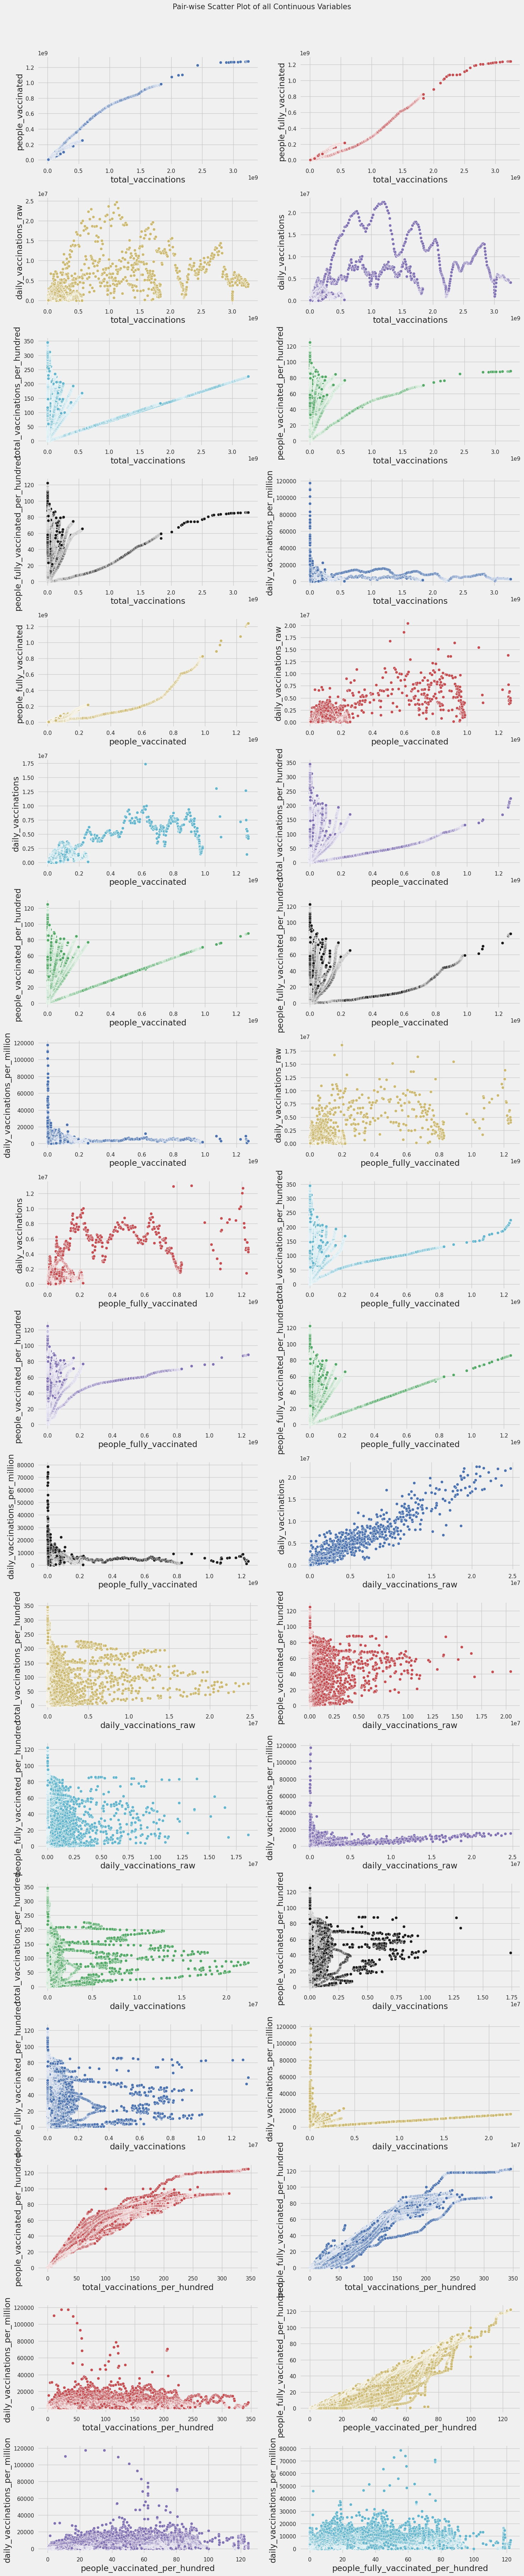

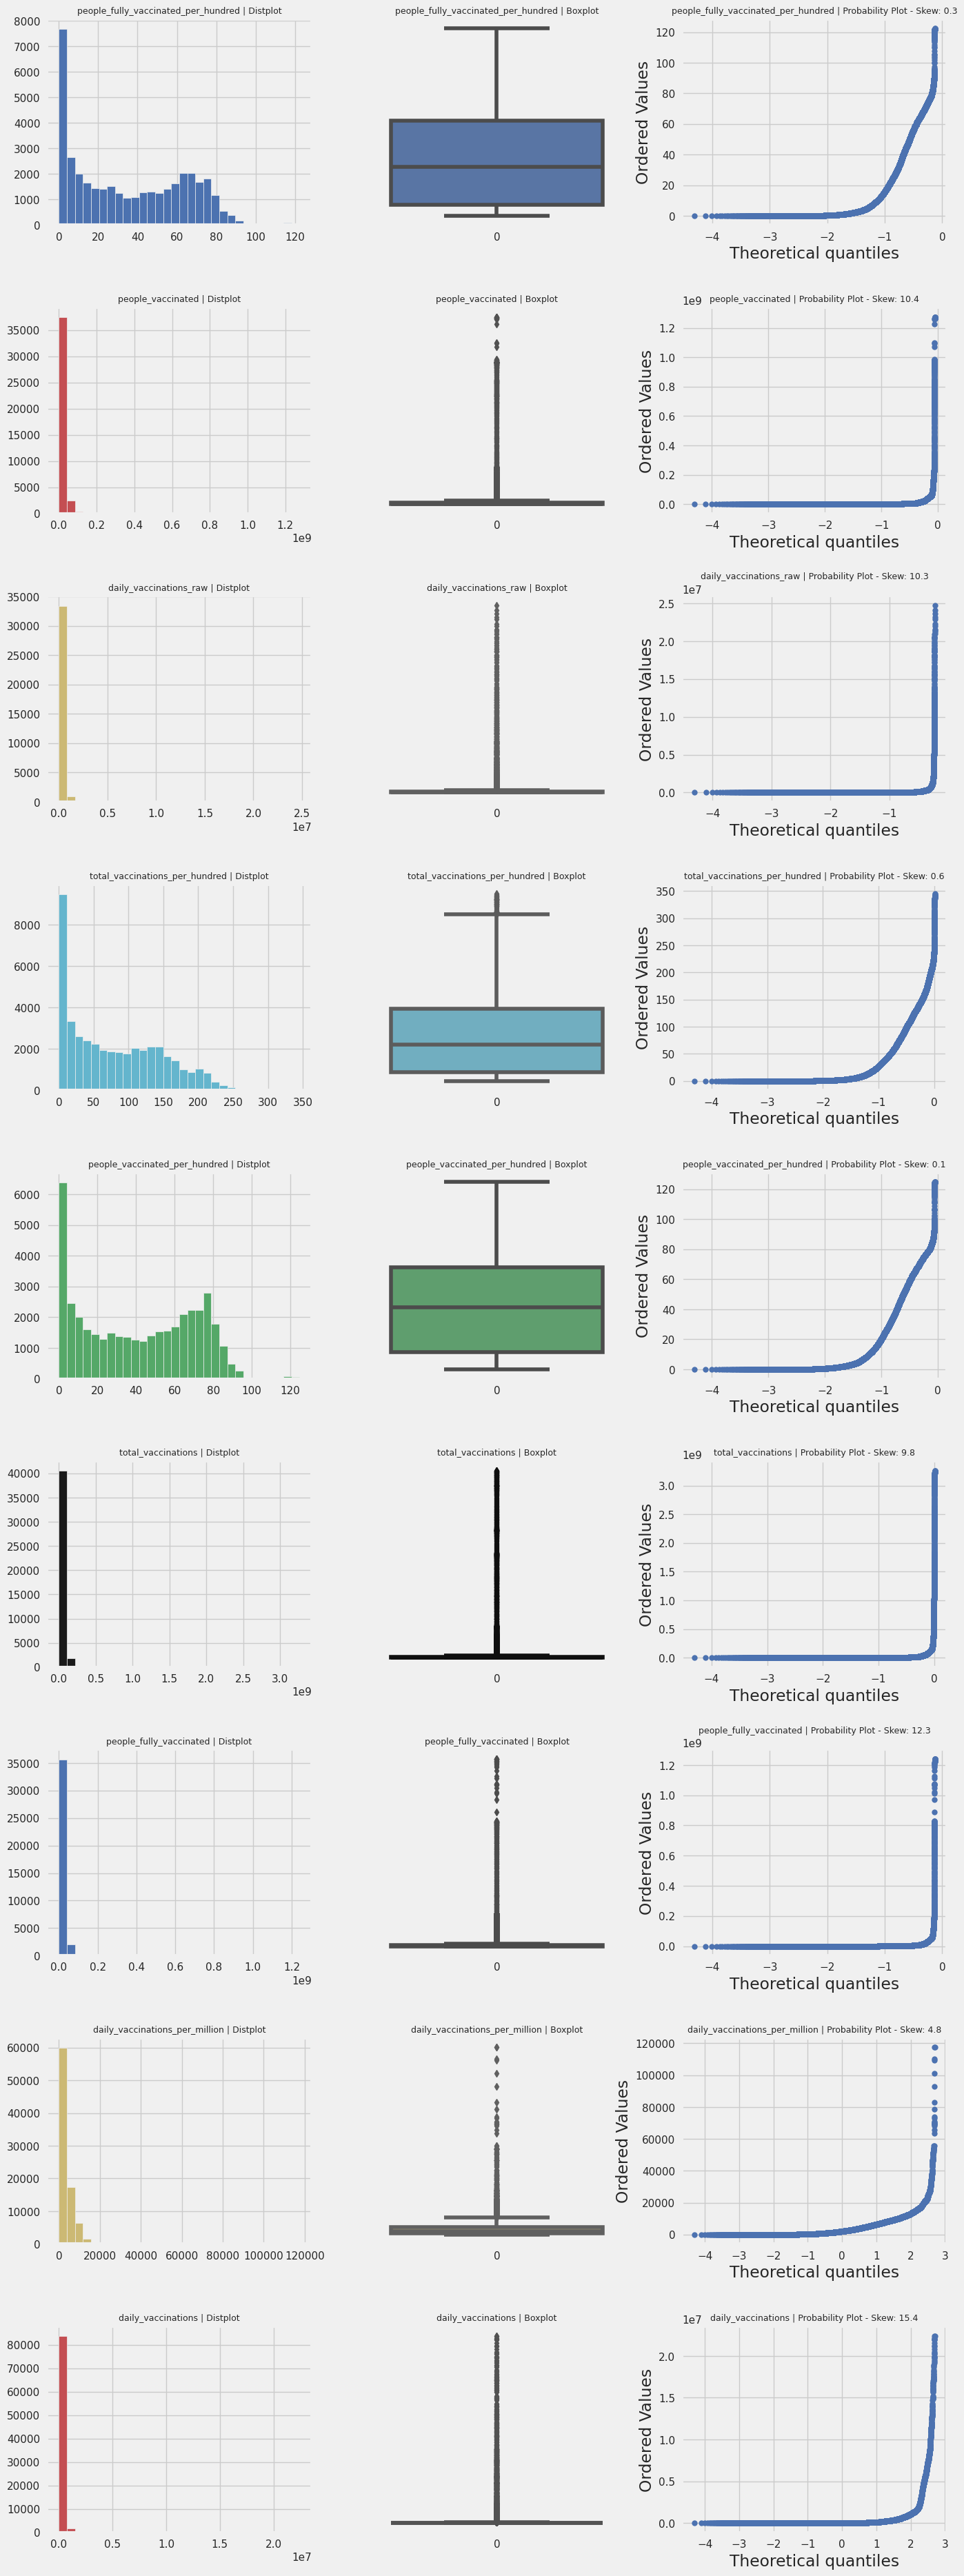

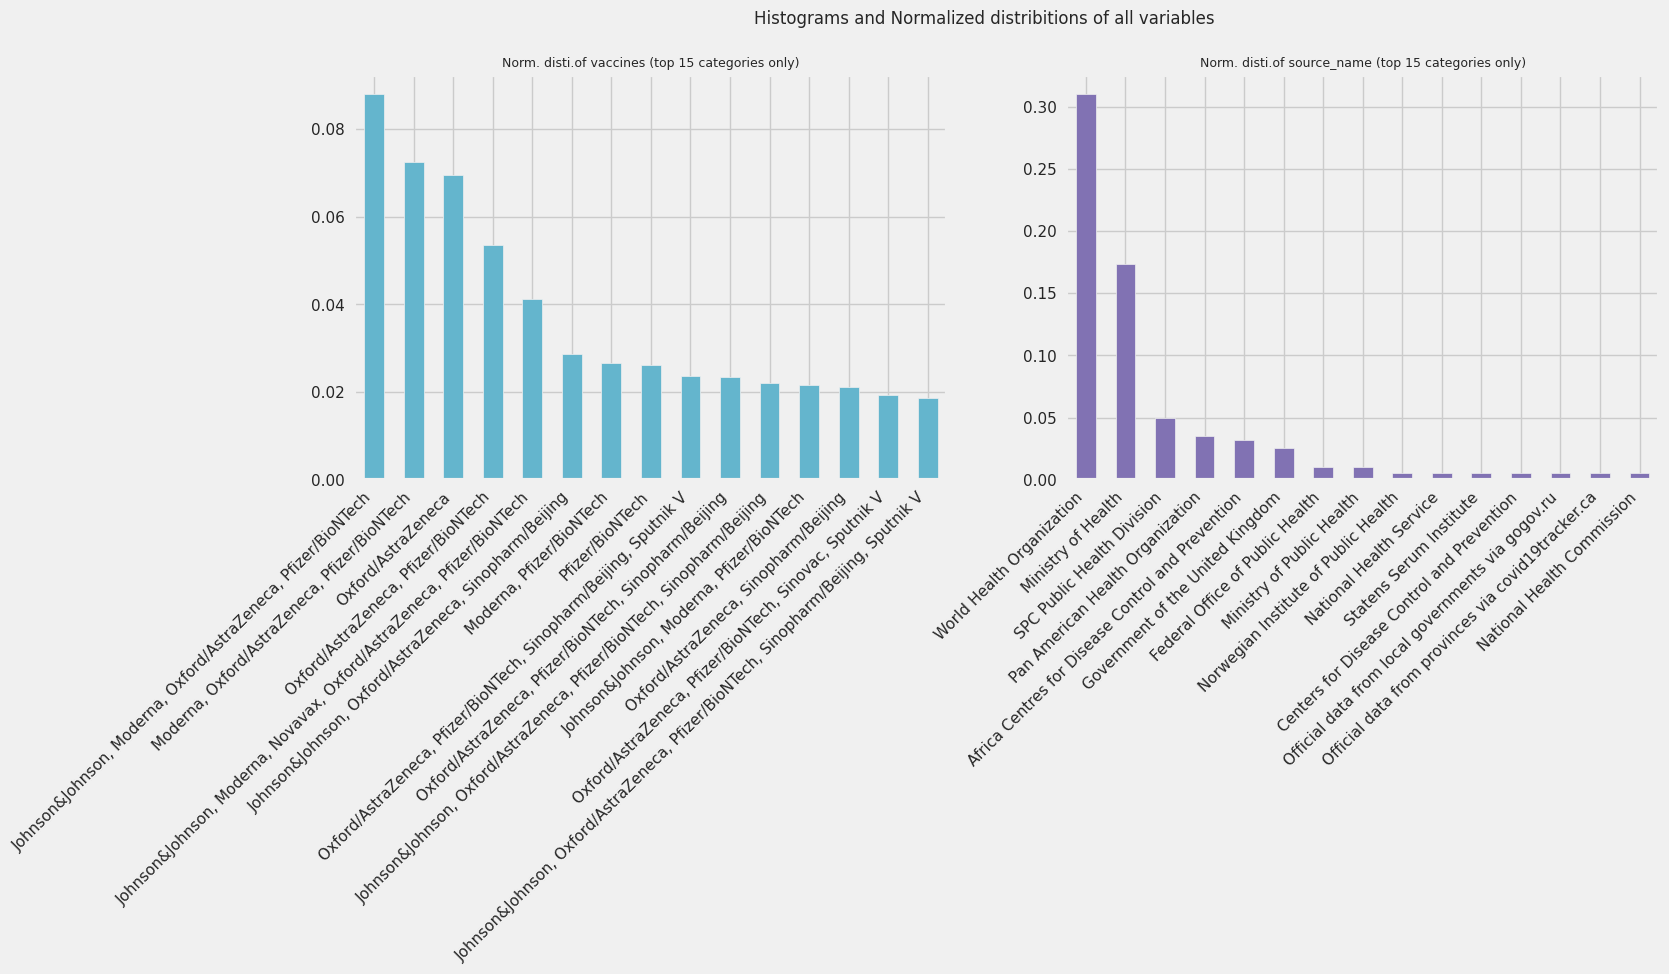

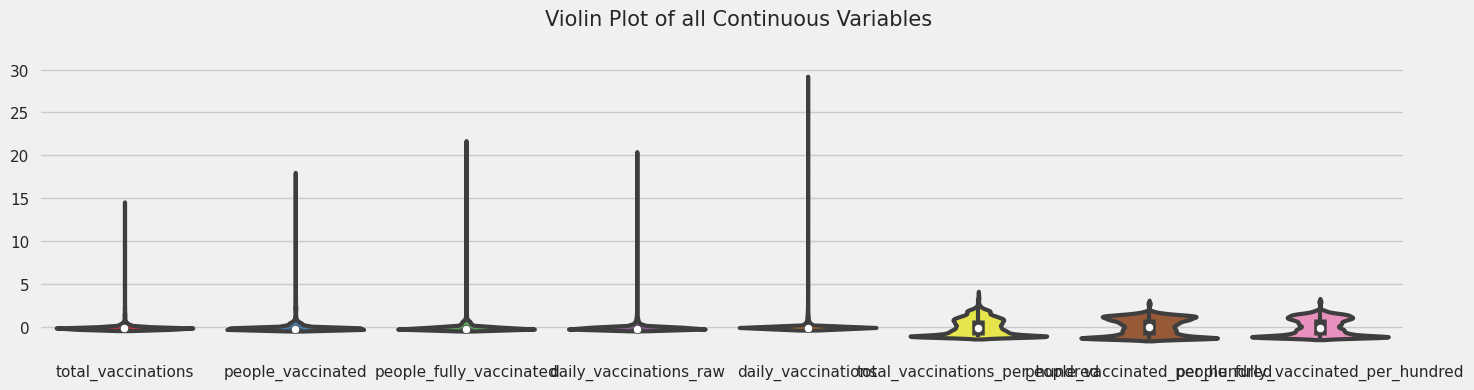

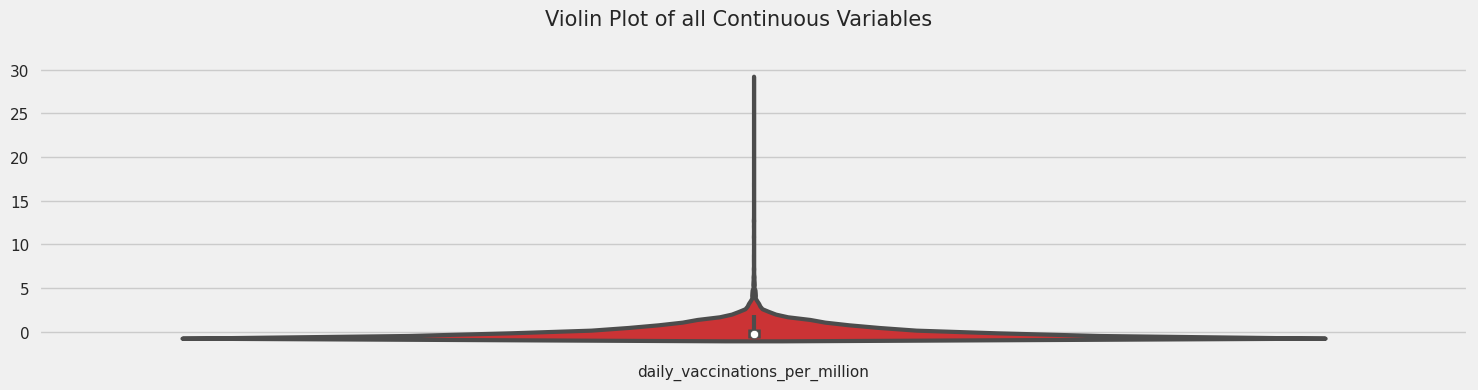

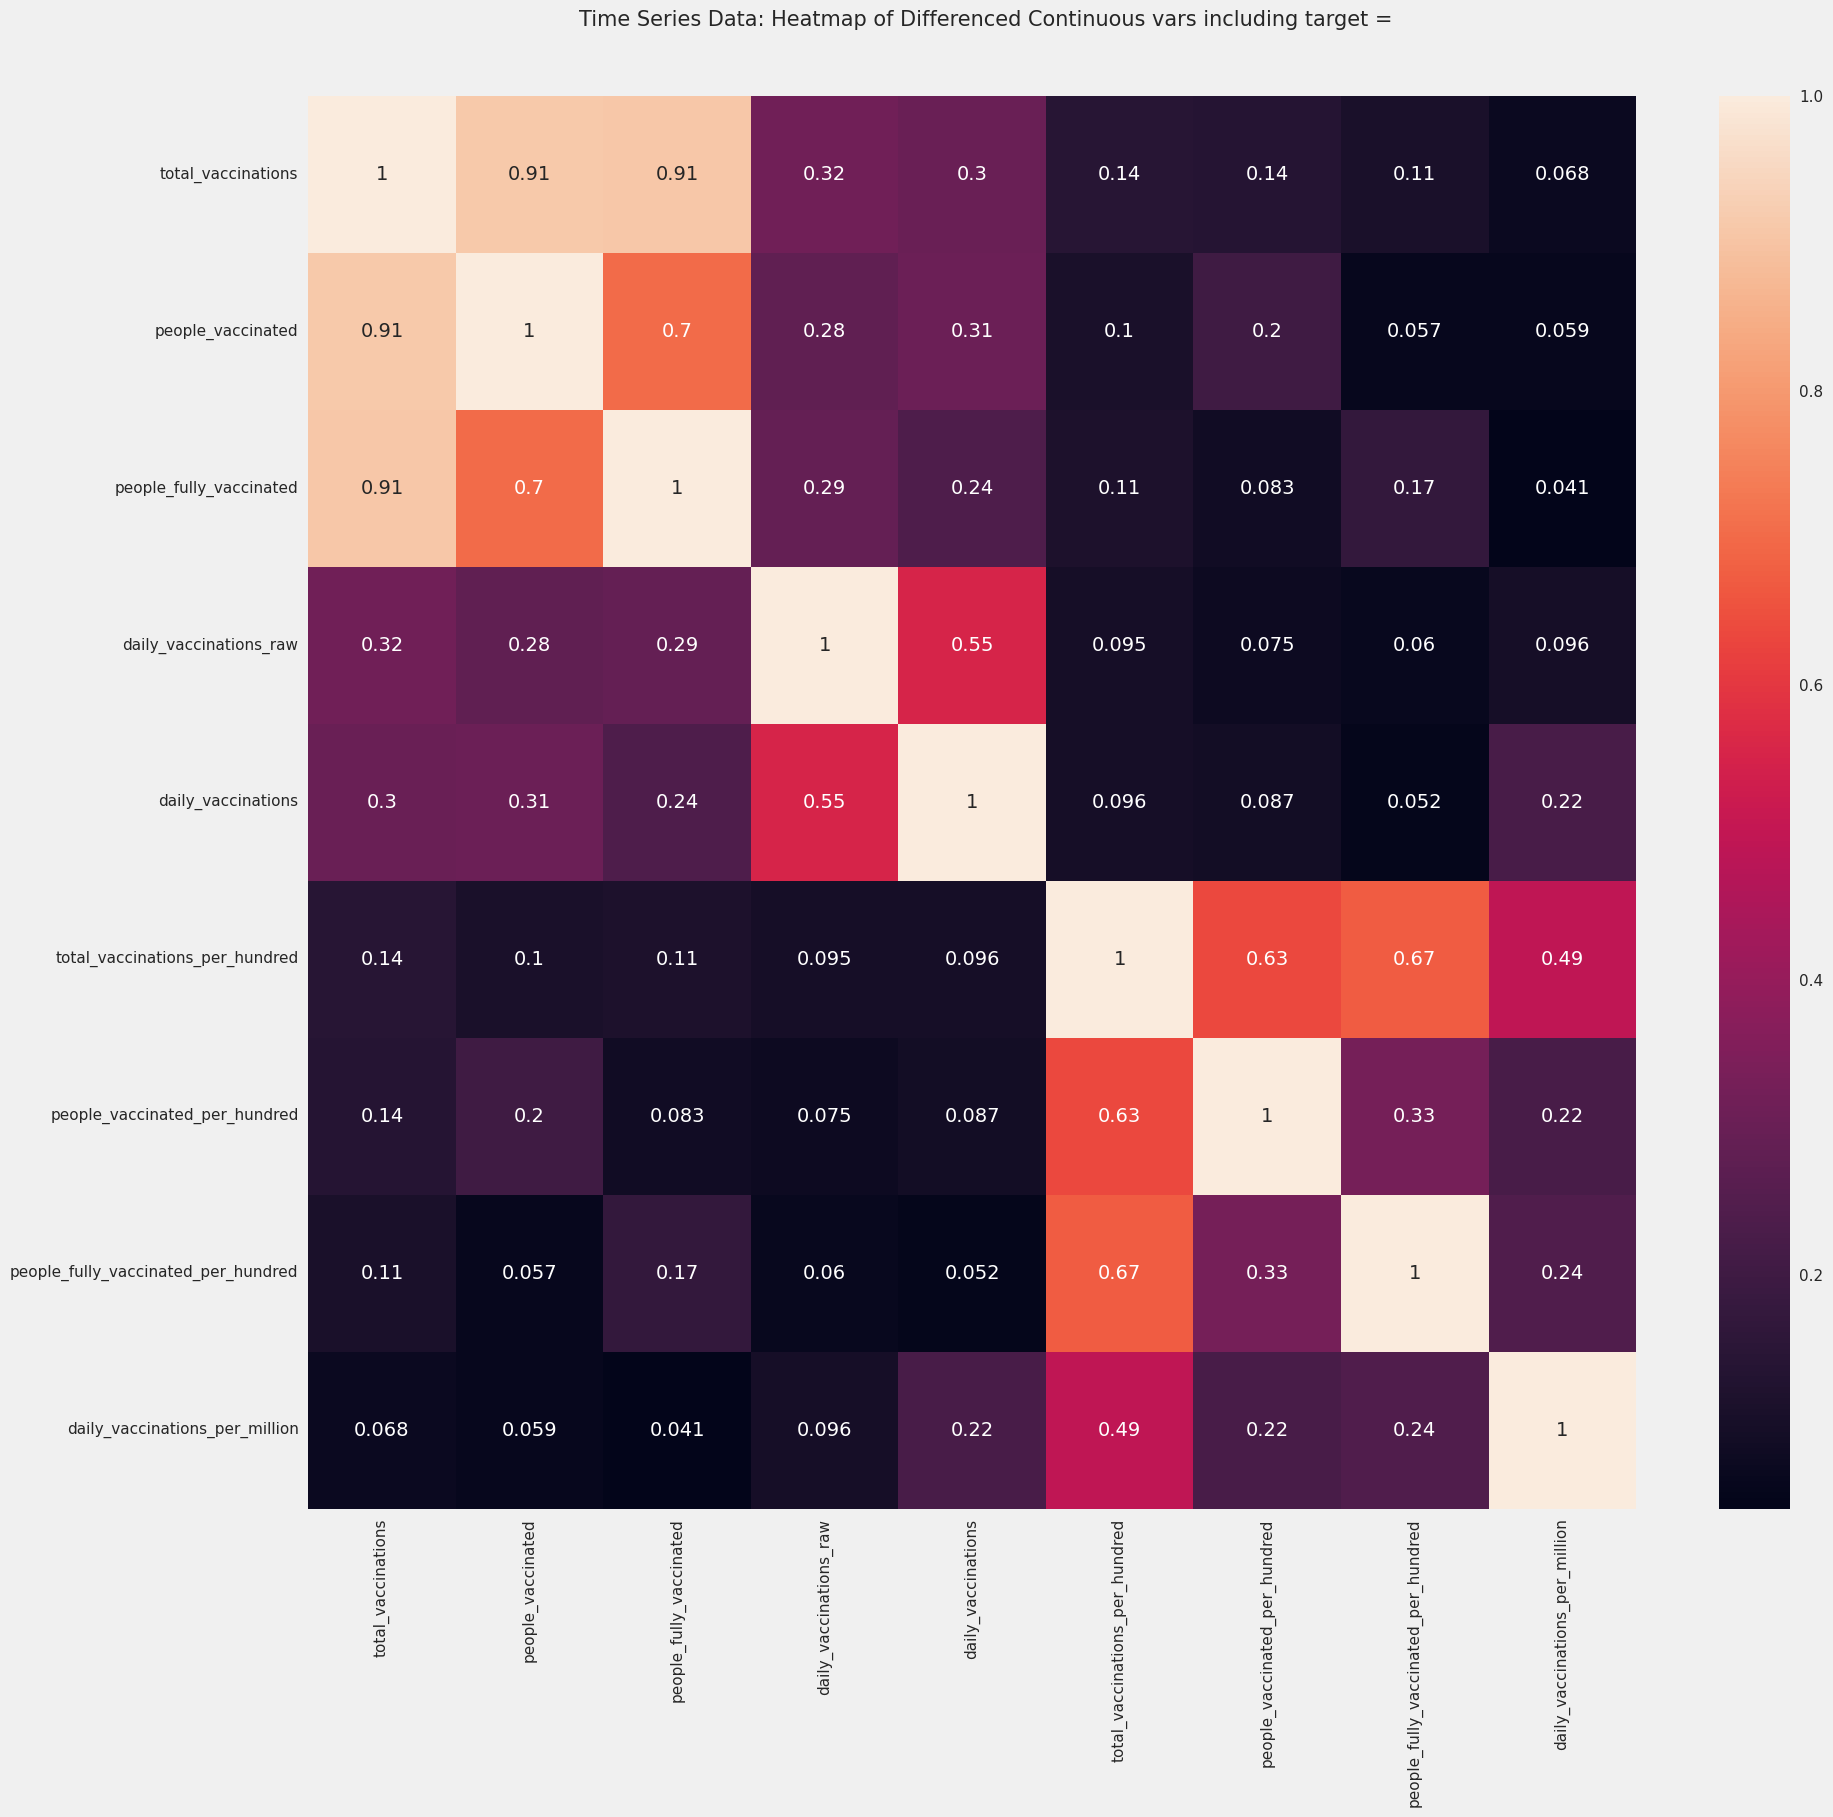

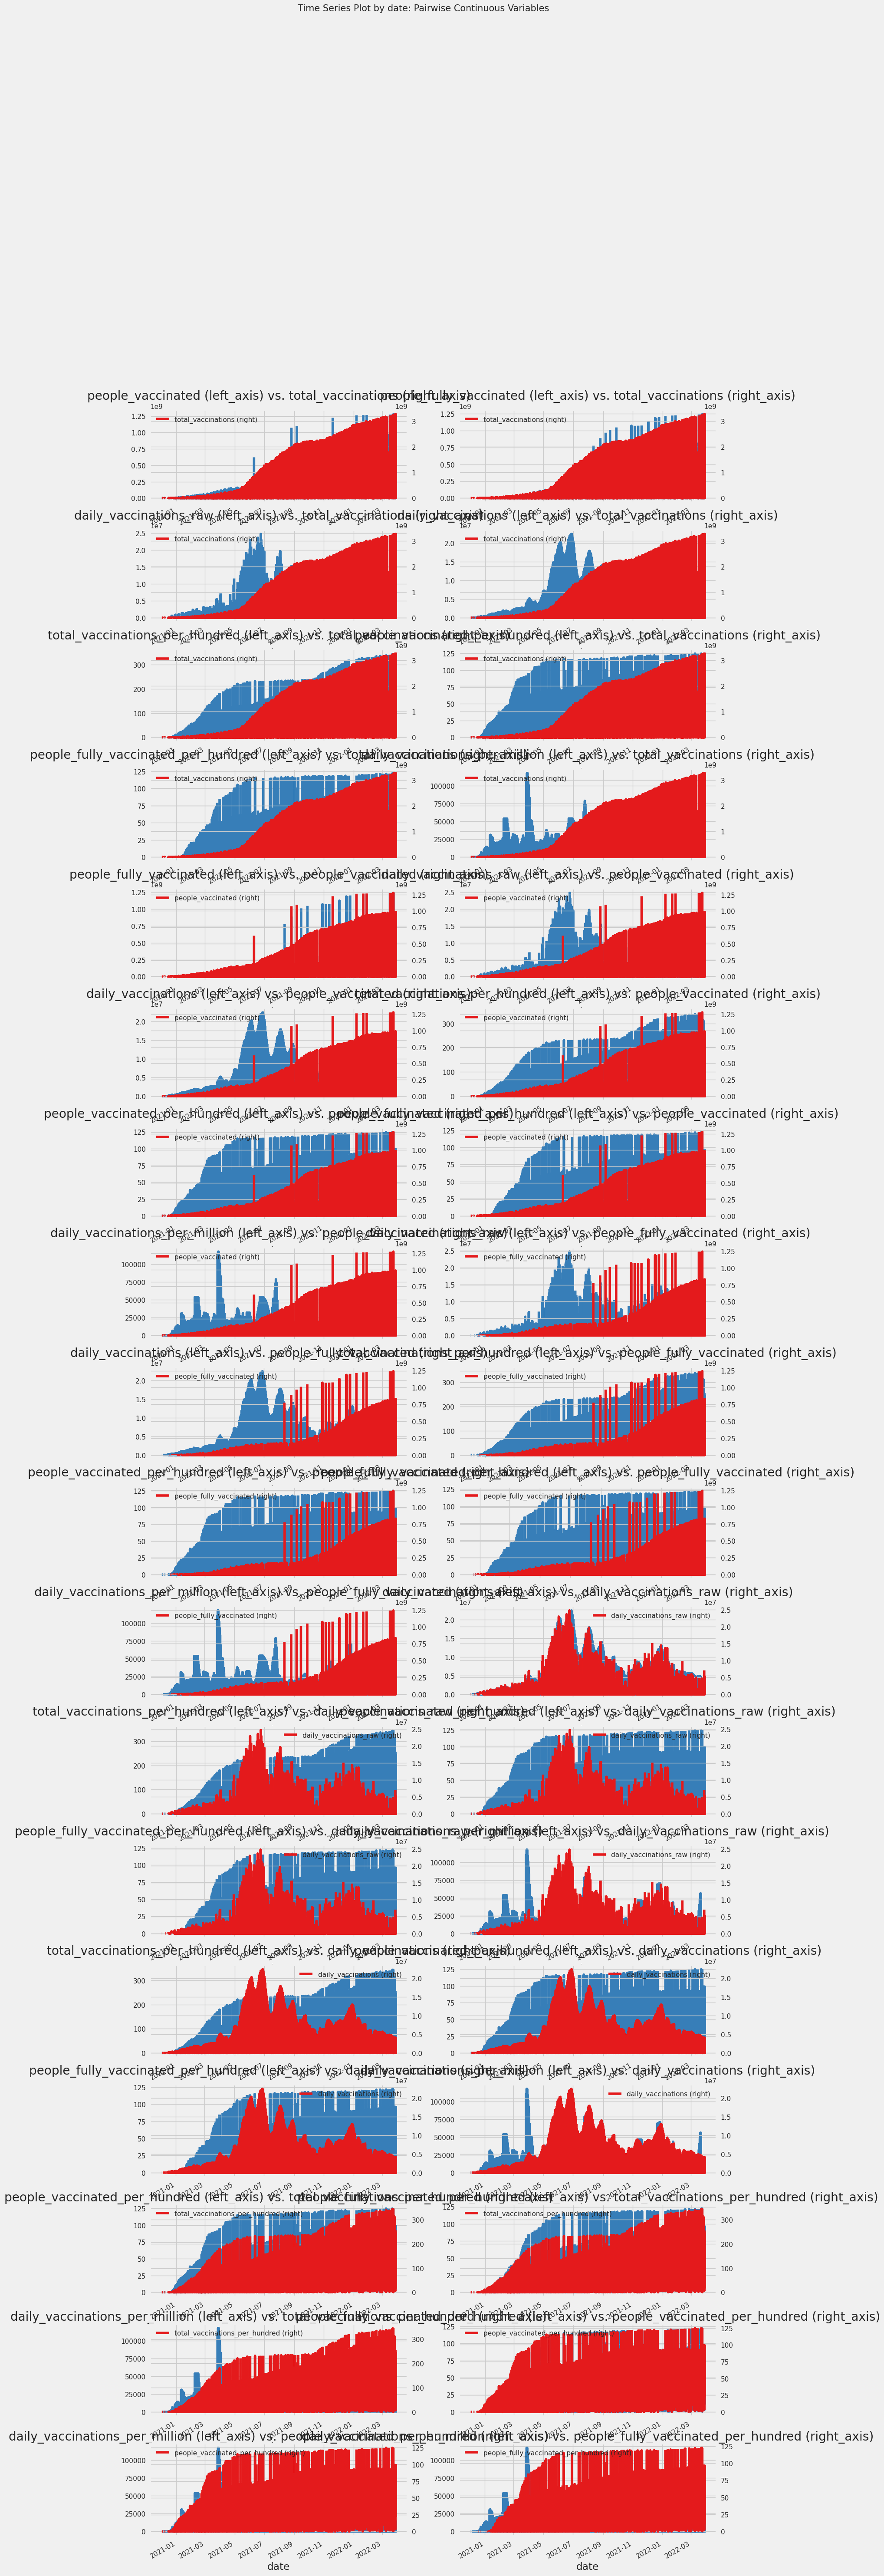

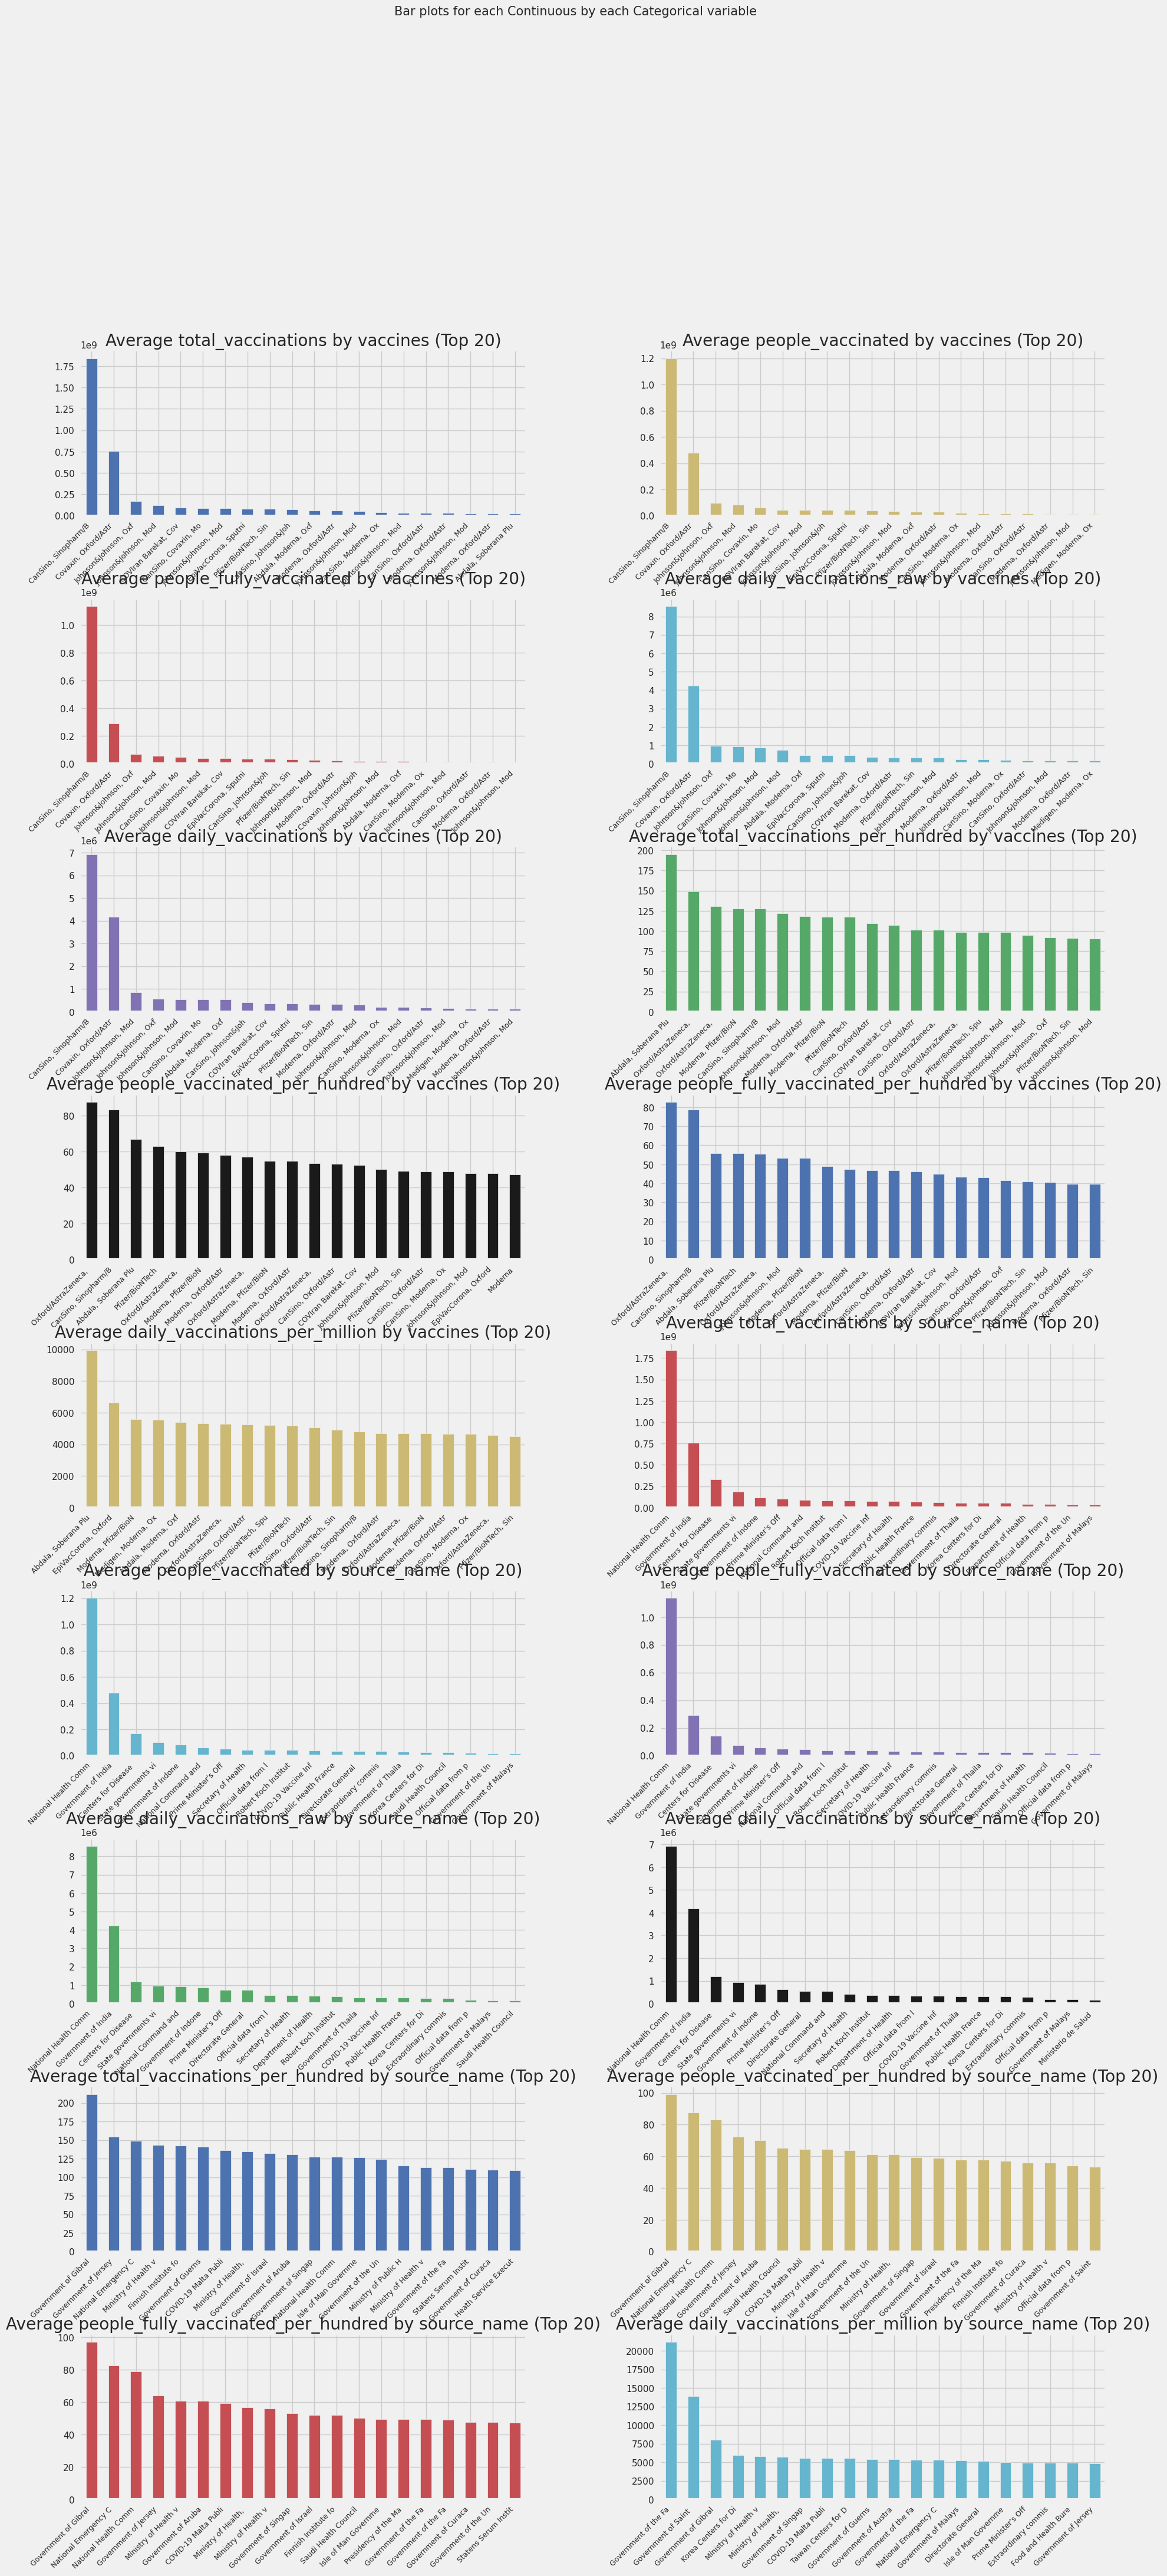

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

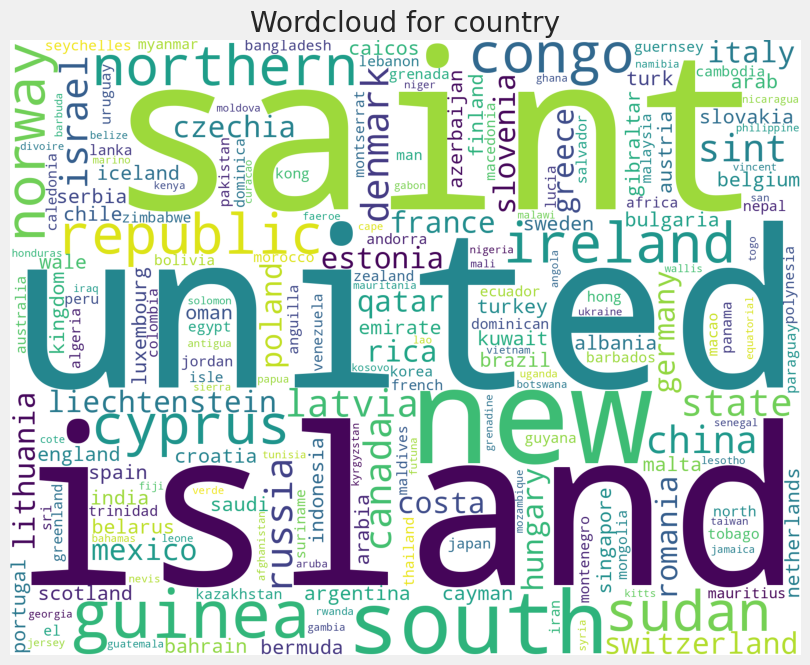

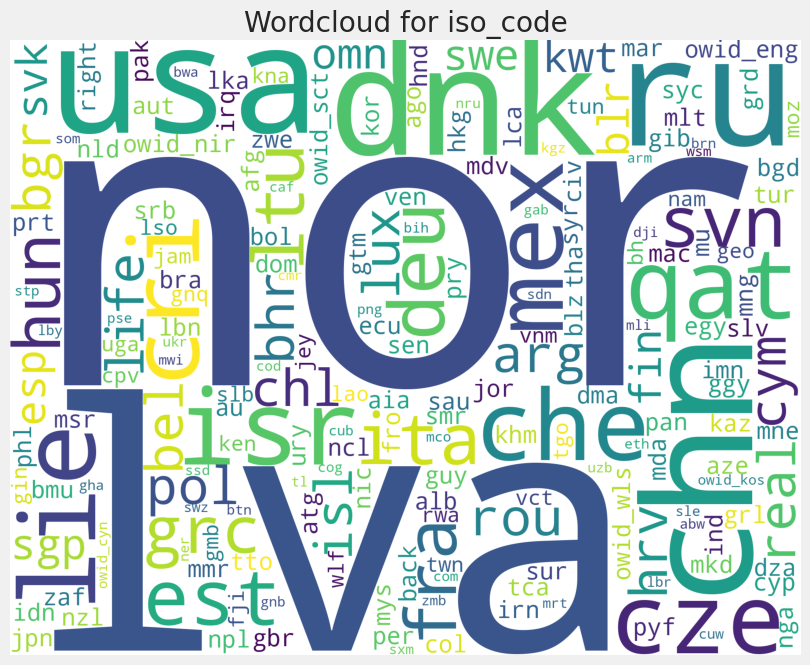

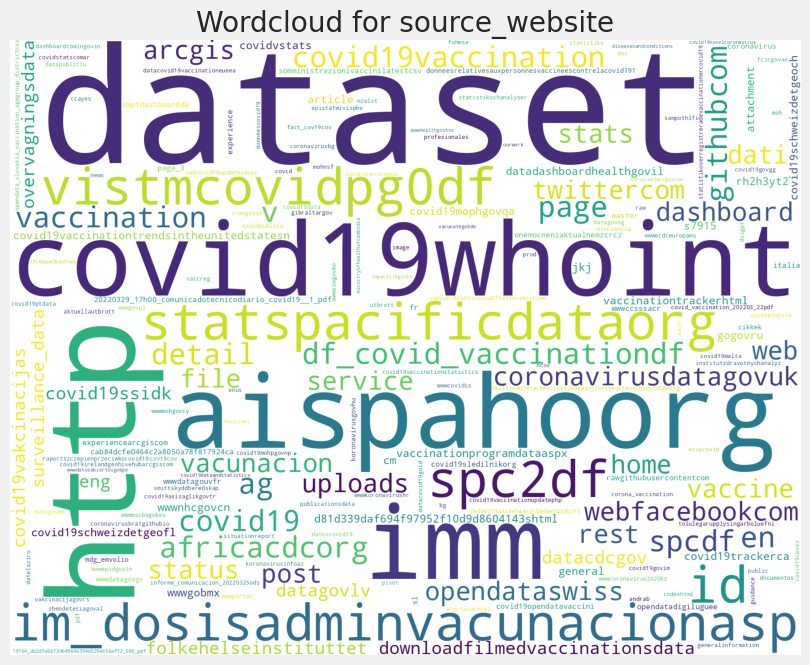

All Plots done
Time to run AutoViz = 226 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
%matplotlib inline
import matplotlib.pyplot as plt
autov_report = AV.AutoViz(filename='', dfte=df)